In [ ]:
!pip install -r requirements.txt

In [10]:
from datetime import datetime
import pandas as pd
from vnstock3 import Vnstock
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

vn30 = Vnstock().stock(symbol='VN30', source='VCI')
data_VN30 = vn30.quote.history(start='2020-01-01', end = current_date, to_df=True)

vni = Vnstock().stock(symbol='VNINDEX', source='VCI')
data_VNI = vni.quote.history(start='2020-01-01', end = current_date, to_df=True)

2024-07-17 16:55:49,929 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-07-17 16:55:50,056 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [5]:
if not os.path.exists('data'):
    os.makedirs('data')

data_VN30.to_csv('data/vn30.csv', index=False)
data_VNI.to_csv('data/vni.csv', index=False)

print("Data saved to 'data/vn30.csv' and 'data/vni.csv'")

Data saved to 'data/vn30.csv' and 'data/vni.csv'


In [23]:
data_VN30.head()

,time,open,high,low,close,volume,daily_change,month
0,2020-01-02,879.02,886.88,876.87,886.88,50389450,NaN,2020-01
1,2020-01-03,887.11,890.38,883.18,883.28,43220590,-3.60,2020-01
2,2020-01-06,882.51,882.51,872.34,872.34,36868840,-10.94,2020-01
3,2020-01-07,872.32,877.34,870.49,876.70,40277740,4.36,2020-01
4,2020-01-08,876.64,876.64,861.51,865.18,53101180,-11.52,2020-01


In [22]:
data_VNI.head()

,time,open,high,low,close,volume,daily_change,month
0,2020-01-02,960.26,966.67,959.67,966.67,131523160,NaN,2020-01
1,2020-01-03,968.72,970.88,965.14,965.14,149202550,-1.53,2020-01
2,2020-01-06,962.79,963.20,955.59,955.79,140978550,-9.35,2020-01
3,2020-01-07,955.39,959.46,953.19,958.88,130272030,3.09,2020-01
4,2020-01-08,954.13,955.84,945.28,948.98,179374340,-9.90,2020-01


In [18]:
def preprocess_data(data):
    # Convert date fields to datetime format
    data['time'] = pd.to_datetime(data['time'])
    
    # Sort data chronologically
    data = data.sort_values(by='time')
    
    # Convert data types
    data['close'] = pd.to_numeric(data['close'], errors='coerce')
    data['volume'] = pd.to_numeric(data['volume'], errors='coerce')
    
    # Drop NaN values
    data = data.dropna()
    
    return data

# Preprocess the data
data_VN30 = preprocess_data(data_VN30)
data_VNI = preprocess_data(data_VNI)

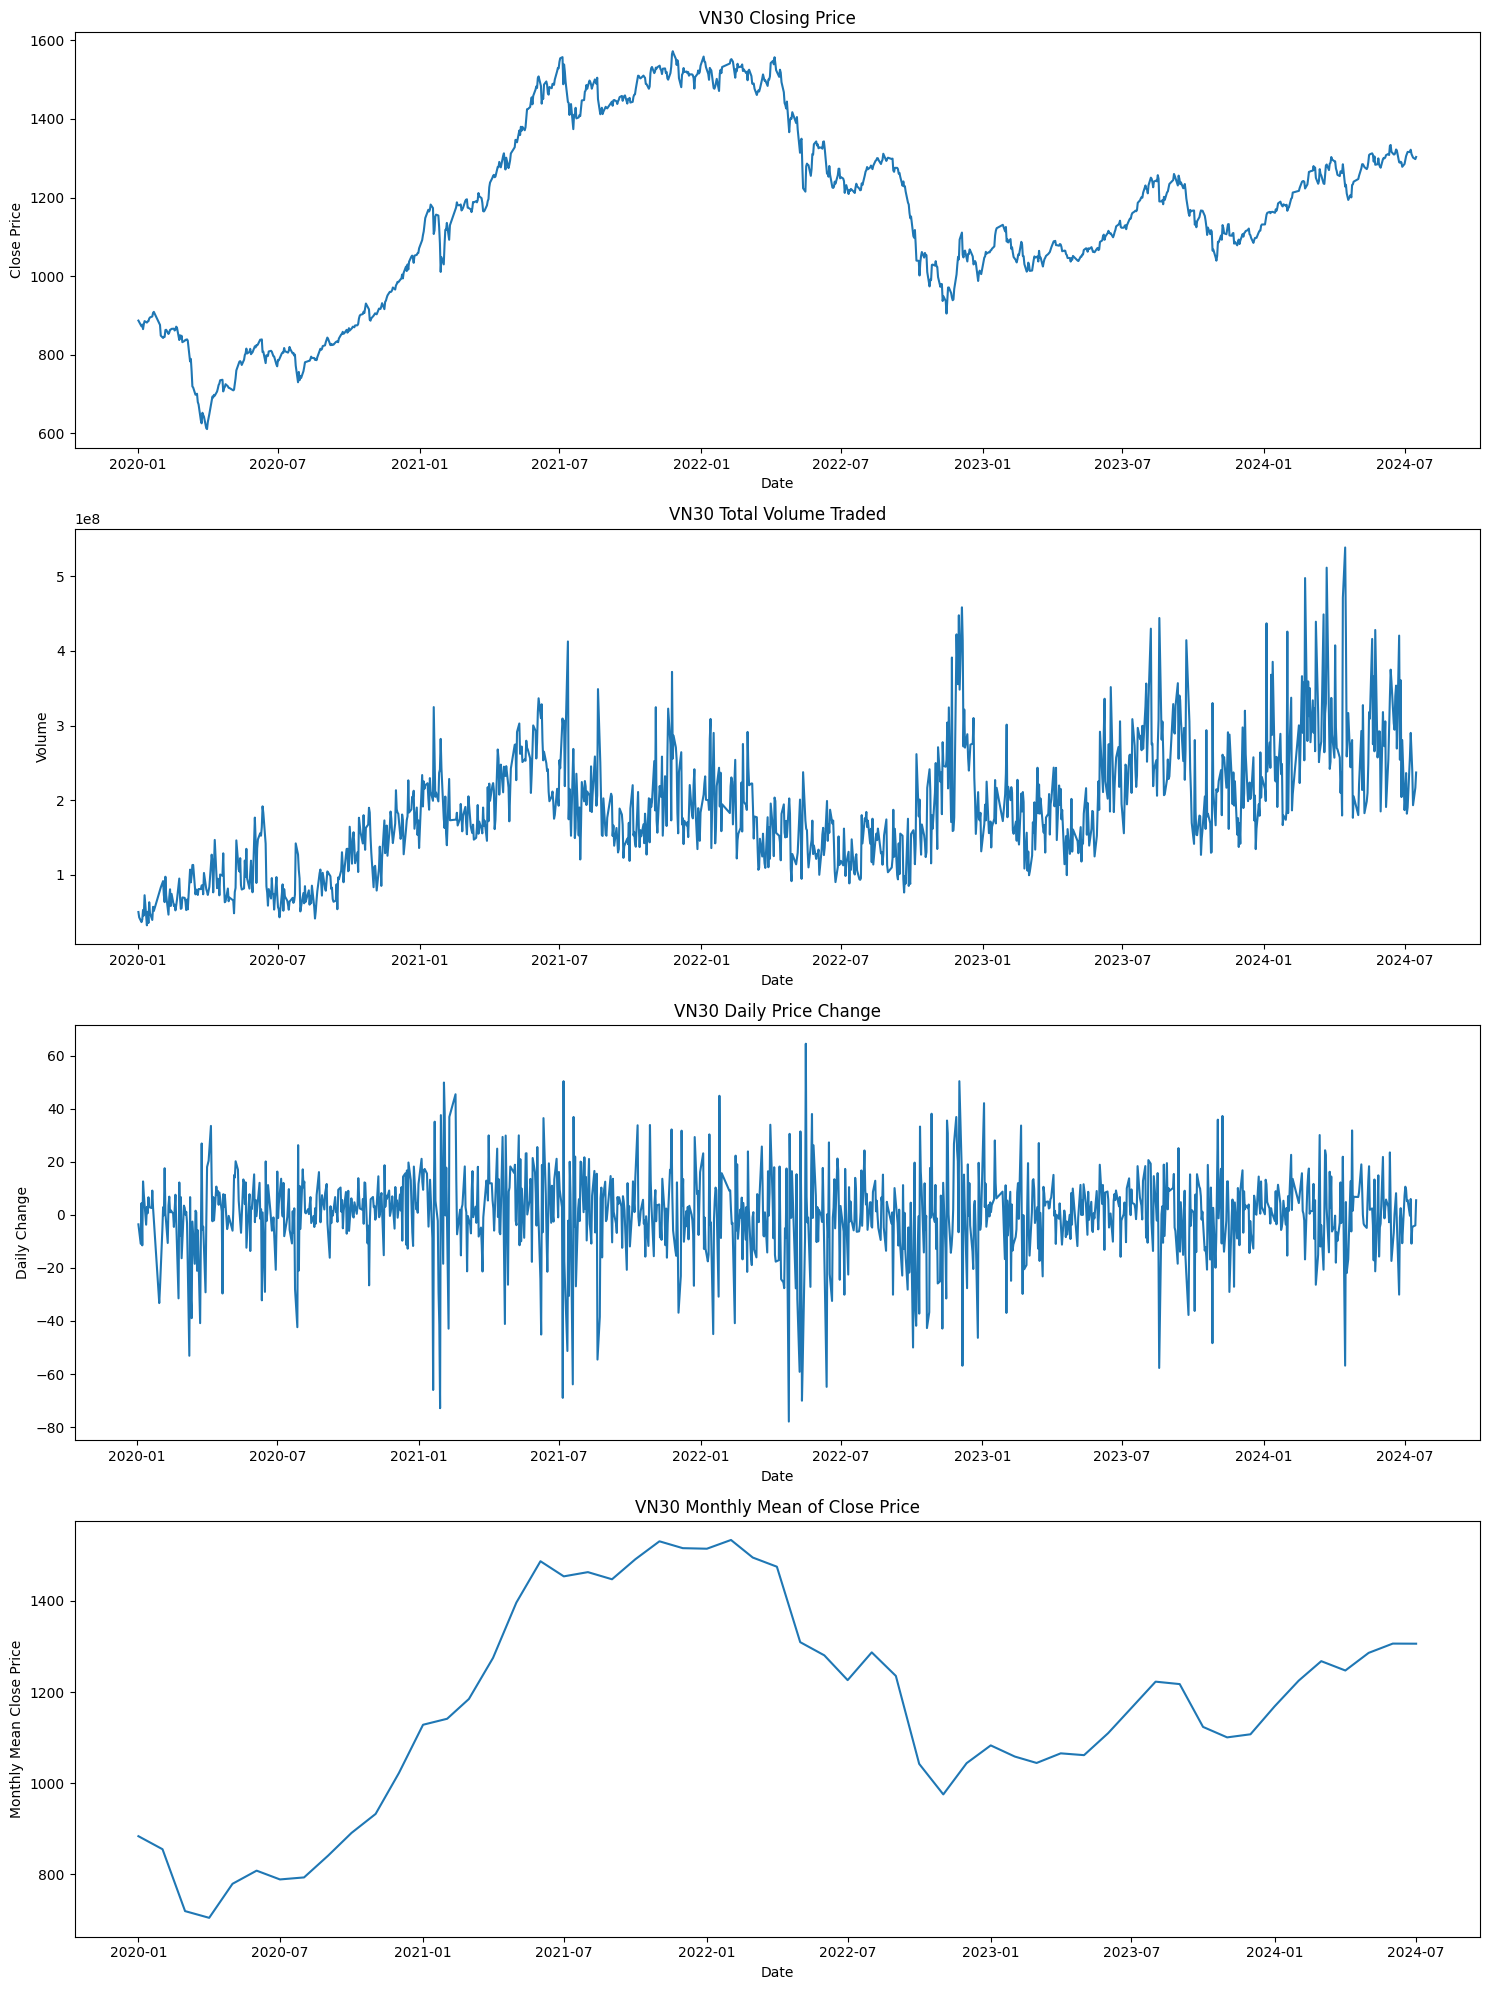

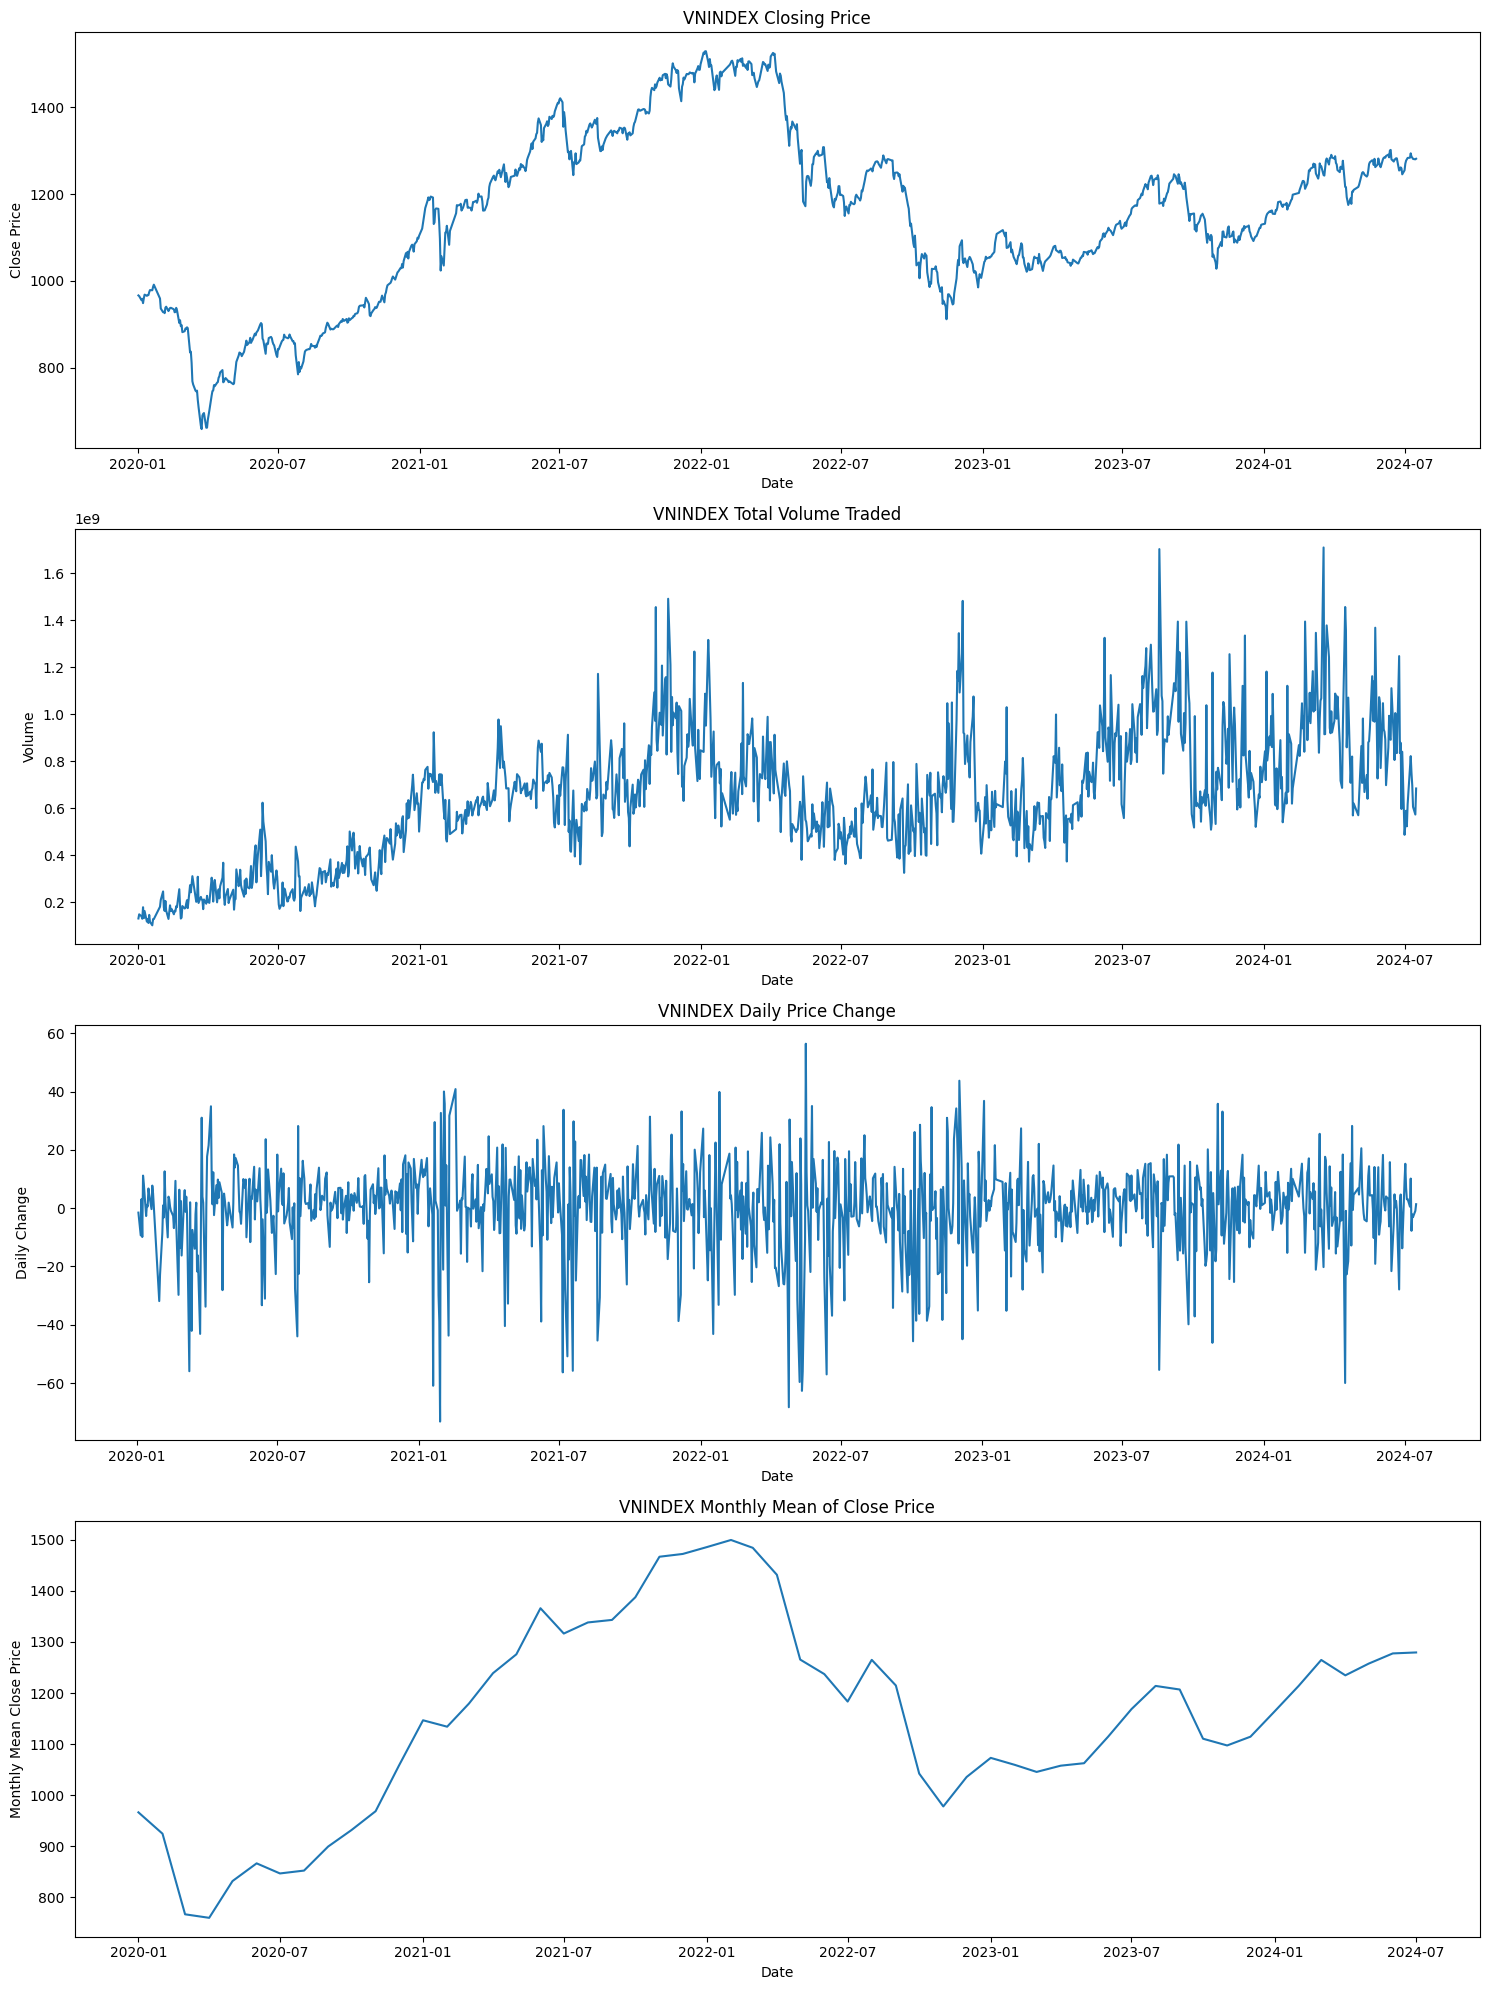

In [19]:
# Function to analyze and plot data
def analyze_and_plot(data, stock_name):
    # Analyze closing price
    closing_price = data[['time', 'close']]

    # Analyze total volume of stocks traded each day
    total_volume = data[['time', 'volume']]

    # Analyze daily price change
    data['daily_change'] = data['close'].diff()

    # Analyze monthly mean of close feature
    data['month'] = data['time'].dt.to_period('M')
    monthly_mean = data.groupby('month')['close'].mean()

    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))

    # Closing price plot
    axs[0].plot(closing_price['time'], closing_price['close'])
    axs[0].set_title(f'{stock_name} Closing Price')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Close Price')

    # Total volume plot
    axs[1].plot(total_volume['time'], total_volume['volume'])
    axs[1].set_title(f'{stock_name} Total Volume Traded')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Volume')

    # Daily price change plot
    axs[2].plot(data['time'], data['daily_change'])
    axs[2].set_title(f'{stock_name} Daily Price Change')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Daily Change')

    # Monthly mean of close feature plot
    axs[3].plot(monthly_mean.index.to_timestamp(), monthly_mean.values)
    axs[3].set_title(f'{stock_name} Monthly Mean of Close Price')
    axs[3].set_xlabel('Date')
    axs[3].set_ylabel('Monthly Mean Close Price')

    # Adjust layout and save plot
    plt.tight_layout()
    plt.savefig(f'{stock_name}_analysis.png')

analyze_and_plot(data_VN30, 'VN30')
analyze_and_plot(data_VNI, 'VNINDEX')